Nem sempre a gente consegue resolver um problema em um único passo.  
Às vezes, é preciso resolver um problema em vários passos, onde cada passo nos leva um pouco mais perto à resposta final.  

Um exemplo é o cálculo da Taxa Interna de Retorno (TIR) de um investimento.  
Anteriormente, nós vimos como resolver esse problema usando o método de Newton.  

Esse método começa com um "chute" para a TIR e vai progressivamente melhorando esse chute até chegar na resposta final.

![metodo-newton](http://www.cs.utsa.edu/~wagner/CS3343/newton/newton.gif)

Hoje, nós vamos aprender como visualizar os passos intermediários desse algoritmo.

Vamos começar lembrando as funções que já criamos em outra aula:

In [2]:
def derivada(f, x, dx = 0.0001):
    dy = f(x + dx) - f(x)
    return(dy/dx)

In [3]:
def raiz_reta_tangente(f, x):
    return(x - f(x)/derivada(f, x))

In [4]:
def raiz(f, x0, tol = 0.0001):
    
    x1 = raiz_reta_tangente(f, x0)
    
    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = raiz_reta_tangente(f, x0)
    
    return(x1)

Podemos modificar a função acima para nos mostrar os passos intermediários:

In [5]:
def raiz(f, x0, tol = 0.0001, mostrar_percurso = False):
    
    x1 = raiz_reta_tangente(f, x0)
    percurso = [x0]
    
    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = raiz_reta_tangente(f, x0)
        percurso.append(x1)
    
    if mostrar_percurso:
        return(percurso)
    else:
        return(x1)

Pronto! Agora, vamos testar se nossa função funciona. Para tal, vamos usar a função $f(x) = x^2 - 25$ como exemplo. Sabemos que a raiz é 5. Logo, se nossas funções estiverem funcionando, o resultado deverá ser 5.

Primeiro, montamos a função $f(x) = x^2 - 25$

In [6]:
def f(x):
    return(x**2 - 25)

Agora, verificamos que nossa função funciona. Precisamos de um chute inicial. Vou colocar o dia do meu aniversário: 1301, um número bem, bem longe da raiz correta.

In [7]:
raiz(f, 1301)

5.000000000015194

Na mosca!!!! 

Agora, vamos mostrar os passos intermediários:


In [8]:
passos = raiz(f, 1301, mostrar_percurso=True)
passos

[1301,
 325.27405700187006,
 162.67548256301174,
 81.41460635225195,
 40.860863187115896,
 20.736372420083818,
 10.971015288087811,
 6.62489328684221,
 5.1992802480410685,
 5.003820929175869,
 5.000001497000304,
 5.000000000015194]

Nos 3 primeiros passos, o algoritmo vai de 1301 para 81. Uma grande mudança.
Nos 3 últimos passos, o algoritmo vai de 5.0038 para 5.0000. Uma diferença muito pequenininha.

É assim que o algoritmo funciona: largos passos até chegar pertinho, e depois passinhos pequenos para ajustar.

No gráfico abaixo, vemos isso de forma mais visual. Note como a curva é muito inclinada no início, e quase horizontal no final:

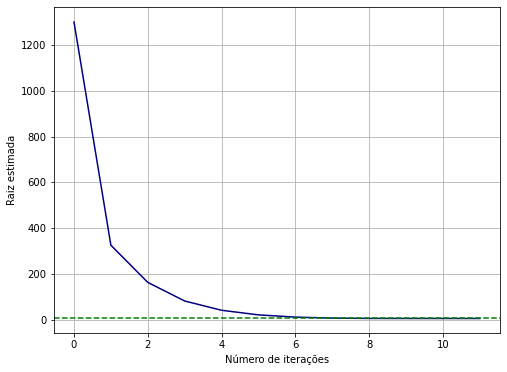

In [9]:
import matplotlib.pyplot as plt
x = raiz(f, 1301, mostrar_percurso=True)
plt.figure(figsize=(8,6))
plt.plot(x, c = 'navy')
plt.axhline(y = 5, c = 'green', linestyle='dashed')
plt.grid('on')
plt.xlabel('Número de iterações')
plt.ylabel('Raiz estimada')
plt.show()

Finalmente, podemos ver esses pontos na própria função $f(x)$.  
Como começamos em $1301$ e terminamos em $5$, temos que ler o gráfixo da direita para a esquerda:

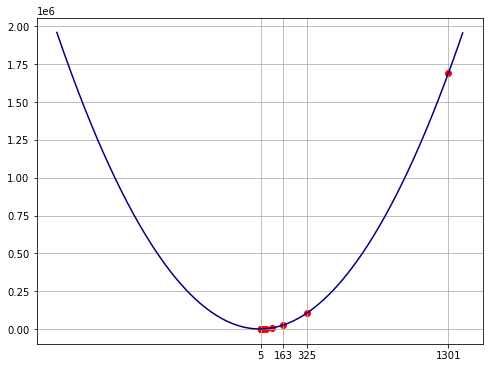

In [11]:
x_ = list(range(-1400,1400))
y_ = [f(i) for i in x_]
plt.figure(figsize=(8,6))
plt.plot(x_,y_, c = 'navy')
x = raiz(f, 1301, mostrar_percurso=True)
y = [f(i) for i in x]
plt.scatter(x,y, c = 'red')
plt.grid('on')
plt.xticks([x[0], x[1], x[2], x[-1]])
plt.show()